Data from: http://web.mta.info/developers/turnstile.html

Header descriptions: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
try:
    df = pd.read_pickle('df.p')
    print('loaded pickled DF')
except:
    print('generating DF from MTA site')
    df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200822.txt')
    # 8/15 to 8/21
    df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200829.txt')
    #8/22 to 8/28
    df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200905.txt')
    #8/29 to 9/04
    df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200912.txt')
    #9/05 to 9/11
    
    #each df is one week (saturday to friday)
    df = pd.concat([df1, df2, df3, df4])
    pickle.dump(df, open('df.p','wb'))

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,00:00:00,REGULAR,7444885,2531033
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,04:00:00,REGULAR,7444886,2531034
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,08:00:00,REGULAR,7444899,2531046
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,12:00:00,REGULAR,7444933,2531082
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,16:00:00,REGULAR,7445032,2531110


In [4]:
graph_data = df.groupby('STATION').sum().sort_values(['ENTRIES'], ascending = False).head(12)

In [5]:
barx = list(graph_data.index)
bary = list(graph_data['ENTRIES'])
bary[0]

1275113142161

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 12 artists>

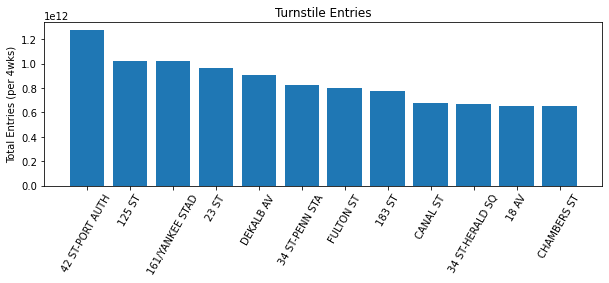

In [8]:
plt.figure(figsize=(10,3))
plt.xticks(rotation=60)
plt.ylabel('Total Entries (per 4wks)')
plt.title('Turnstile Entries')
plt.bar(barx,bary)
